In [28]:
import pandas as pd

#Problem 1 Create a scatterplot eruption time versus waiting time
# Load the dataset
file_path = '/Users/jenniferposada/Desktop/733/homework/homework_3/faithful.csv'  
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85


Text(0, 0.5, 'Y-axis Label (waiting)')

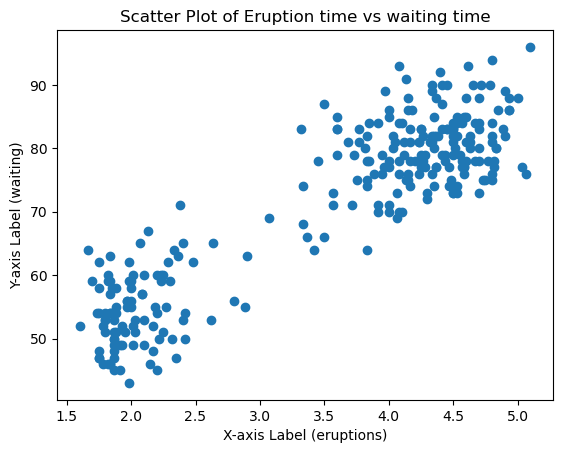

In [29]:
import matplotlib.pyplot as plt
#using matplotlib library to create scatter plot

# Step 2: Extract columns for the scatter plot
# Replace 'column_x' and 'column_y' with your actual column names
#x = data['column_x']
#y = data['column_y']

x = data['eruptions']
y = data['waiting']

# Step 3: Create the scatter plot
#plt.scatter(x, y)

plt.scatter(x, y)

# Step 4: Customize the plot
#plt.title("Scatter Plot of Your Dataset")
#plt.xlabel("X-axis Label (column_x)")
#plt.ylabel("Y-axis Label (column_y)")


plt.title("Scatter Plot of Eruption time vs waiting time")
plt.xlabel("X-axis Label (eruptions)")
plt.ylabel("Y-axis Label (waiting)")


In [30]:
#Question 1B -How many clusters do you see based on your scatter plot? 
#For the purposes of this question, a cluster is a “blob” of many data points that are close together, 
#with regions of fewer data points between it and other “blobs”/clusters. (5 points) 

In [31]:
print("there are two clusters on the scatterplot")

there are two clusters on the scatterplot


In [32]:
#Question 1C - Describe the steps of a hierarchical clustering algorithm.
#Based on your scatter plot, would this method be appropriate for this dataset? (10 points) 

#This method is appropriate

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Compute the distance matrix
distance_matrix = pdist(data, metric='euclidean')  # Pairwise distances

# Perform average linkage clustering
linkage_matrix = linkage(distance_matrix, method='average')

# Display the linkage matrix (optional, for debugging)
print(linkage_matrix)


[[ 10.          52.           0.           2.        ]
 [ 13.          21.           0.           2.        ]
 [ 25.          79.           0.           2.        ]
 ...
 [536.         538.          10.19658895 100.        ]
 [535.         539.          11.30214614 172.        ]
 [540.         541.          25.64264561 272.        ]]


In [33]:
print("""This is appropriate for this dataset because the data shows a natural hierarchy and grouping between points.
The dendrogram I made showed clear separation after cutting. 
There was a small overlap but it was mostly in two clusters. """)

This is appropriate for this dataset because the data shows a natural hierarchy and grouping between points.
The dendrogram I made showed clear separation after cutting. 
There was a small overlap but it was mostly in two clusters. 


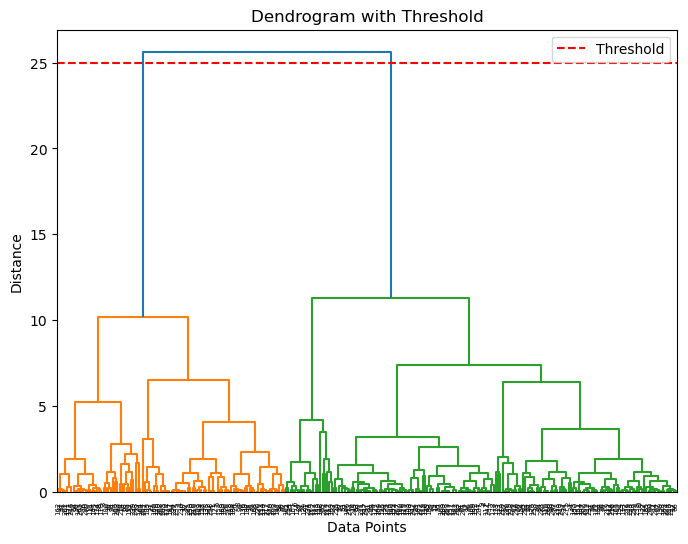

In [34]:
# Set a threshold (adjust based on dendrogram observation)
threshold = 25  # Adjust this value based on your dendrogram

# Plot dendrogram with threshold line
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.title("Dendrogram with Threshold")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [35]:
from scipy.cluster.hierarchy import fcluster

# Create cluster labels
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Display data with cluster assignments
print(data)


     eruptions  waiting  Cluster
0        3.600       79        2
1        1.800       54        1
2        3.333       74        2
3        2.283       62        1
4        4.533       85        2
..         ...      ...      ...
267      4.117       81        2
268      2.150       46        1
269      4.417       90        2
270      1.817       46        1
271      4.467       74        2

[272 rows x 3 columns]


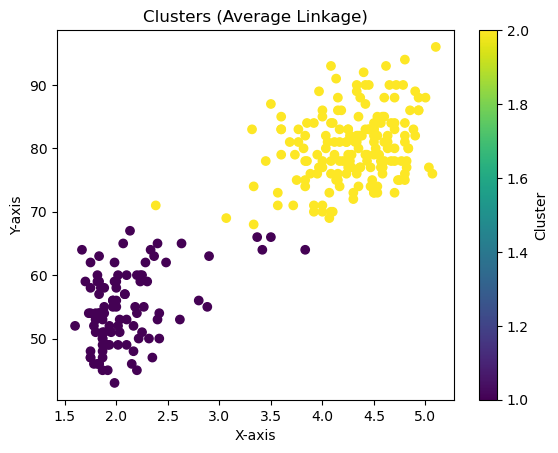

In [36]:
# Scatter plot with cluster labels
plt.scatter(data['eruptions'], data['waiting'], c=data['Cluster'], cmap='viridis')
plt.title("Clusters (Average Linkage)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.colorbar(label='Cluster')
plt.show()


In [37]:
# Print response for appropriateness
print("""This method is appropriate for this dataset because the data shows a
natural hierarchy and grouping between points. 
The dendrogram I made showed clear separation after cutting.
There was a small overlap but it was mostly in two clusters.""") 



This method is appropriate for this dataset because the data shows a
natural hierarchy and grouping between points. 
The dendrogram I made showed clear separation after cutting.
There was a small overlap but it was mostly in two clusters.


In [38]:
# Problem 2 

In [39]:
#Implement the k-means algorithm in Python, and use it to perform clustering on the Old Faithful dataset. 
#Use the number of clusters that you identified in Problem 1. Be sure to ignore the first column,
#which contains instance ID numbers. In your notebook, including the following items:
#Your source code for the k-means algorithm. You need to implement the algorithm from scratch. 

from sklearn.cluster import KMeans

#2A - Initialize KMeans Algorithm with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the data
kmeans.fit(data)

# Get cluster labels
data['Cluster'] = kmeans.labels_

# Display the dataset with cluster labels
print(data)



     eruptions  waiting  Cluster
0        3.600       79        0
1        1.800       54        1
2        3.333       74        0
3        2.283       62        1
4        4.533       85        0
..         ...      ...      ...
267      4.117       81        0
268      2.150       46        1
269      4.417       90        0
270      1.817       46        1
271      4.467       74        0

[272 rows x 3 columns]


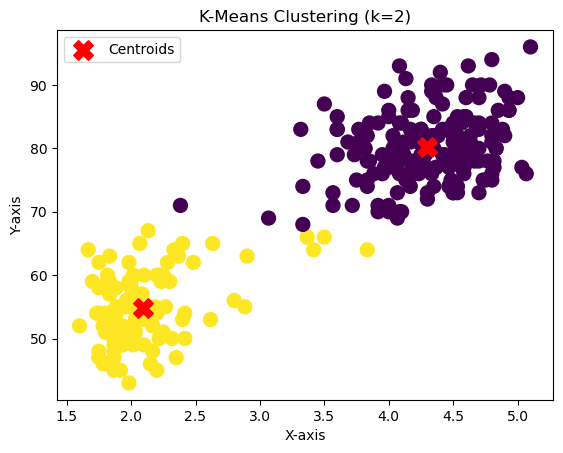

In [40]:
#2B- Scatter plot with cluster labels
plt.scatter(data['eruptions'], data['waiting'], c=data['Cluster'], cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering (k=2)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()


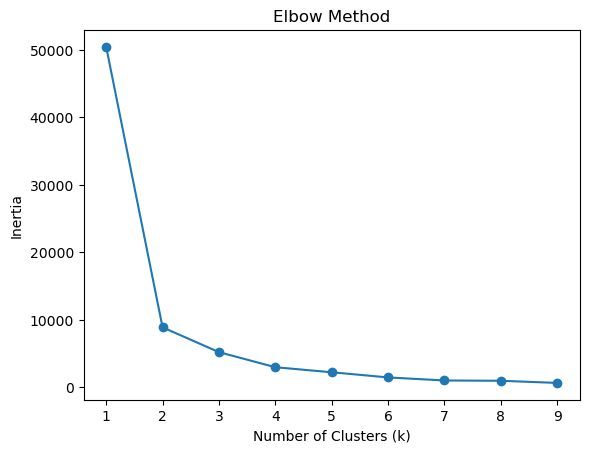

In [41]:
inertia_values = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['eruptions', 'waiting']])
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to check clusters are correct
plt.plot(range(1, 10), inertia_values, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


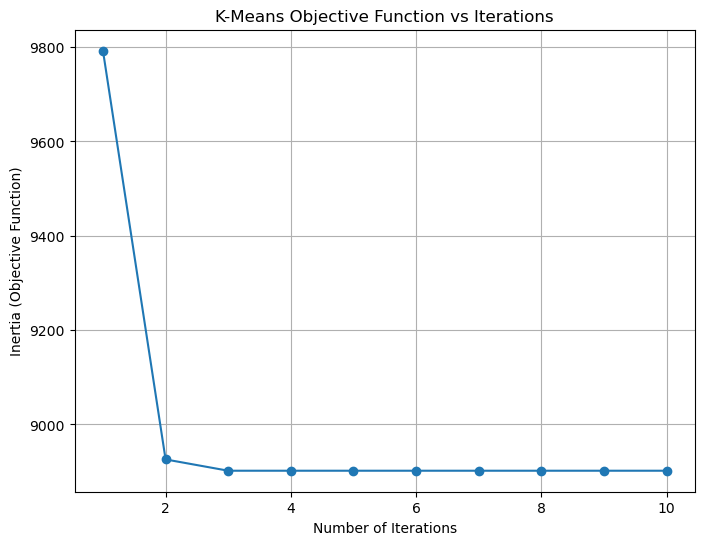

In [42]:
#2C Create a Plot of K-Means Objective Function vs Iterations of Algorithm
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Use your dataset
# Load the dataset
file_path = '/Users/jenniferposada/Desktop/733/homework/homework_3/faithful.csv'  
data = pd.read_csv(file_path)

# Prepare data for clustering
X = data[['eruptions', 'waiting']].values  # Extract X and Y columns as NumPy array

# Parameters
n_clusters = 2  # Based on your scatterplot
max_iter = 10  # Maximum iterations for K-Means

# Track inertia values for each iteration
inertia_values = []

# Run K-Means step-by-step and record inertia
for i in range(1, max_iter + 1):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot Inertia vs Iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_iter + 1), inertia_values, marker="o")
plt.title("K-Means Objective Function vs Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Inertia (Objective Function)")
plt.grid()
plt.show()


In [ ]:
#Question 2D - Did Did the method manage to find the clusters that you identified in Problem 1? 
#If not, did it help to run the method again with another random initialization? 

In [44]:
print("Using K-means objective function found the 2 clusters I identified in problem 1.")

Using K-means objective function found the 2 clusters I identified.
